## Health Nutrition and Population Statistics
 
The dataset can be found
https://www.kaggle.com/datasets/theworldbank/health-nutrition-and-population-statistics

The dataset for this project will be taken from the Health Nutrition and Population Statistics dataset available on the Kaggle website in CSV format. The dataset consists of key demographic, health, and nutrition statistics provided by the Health Nutrition and Statistics database, which compiles information from numerous international and domestic sources. Examples of the data attributes, Universal health coverage, population dynamics, global surgery, health financing, HIV/AIDS, nutrition, reproductive health, medical resources and usage, immunization rates, infectious diseases, population projections, vitamin A supplementation rates, water, and sanitation details. This dataset spans 345 indicators from 263 different nations. Yearly data collection was placed between 1960 and 2016. The dataset was chosen because it is relatable structured data. Redundant data for example variables with no reported data per year can be easily discarded. It is possible to compare a Country V a Region, (United Kingdom V European Union) or Wealth v Poverty (High Income V Low Income).

The primary goal of performing analytics in this project is to find an answer to the following questions (which may change based on data exploration):

1 Is there a correlation between limited education and unemployment levels? Do the results vary between richer and poorer countries? Numerous studies have confirmed that educated people have a lower probability of a life of poverty. Is there a high or lower correlation between education rates and poverty depending on a country’s Gross National Income?

2 How does contraceptive prevalence impact Fertility Rates which could result in more Maternal Deaths? 

3 Is there a correlation between Government Health Expenditure and Mortality Rates? Are the claims about Government health spending in the Michael Moore documentary Sicko true?

4 It is too early to tell the impact of Brexit on the United Kingdom (UK) society but was there a difference prior to Brexit between life in the UK and European Union (EU)

In [0]:
! pip install pyspark
! pip install dask
import pyspark
# Similar to SparkContext, for SparkSQL you need a SparkSession
# PySpark is the Python API written in python to support Apache Spark.
# Apache Spark is written in Scala and can be integrated with Python, Scala, Java, R, SQL languages
from pyspark.sql import SparkSession
# Also all the functions (select, where, groupby) needs to be imported
from pyspark.sql.functions import *
from pyspark.sql.types import *
# Get or Create spark session

# SQLContext is a class and is used for initializing the functionalities of Spark SQL. 
# SparkContext class object (sc) is required for initializing SQLContext class object.
from pyspark.sql import SQLContext
spark = SparkSession.builder.appName('cluster').getOrCreate()

# SQLite RDBMS
import sqlite3

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-05d72b2f-9c0c-4768-9481-625244d69da8/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-05d72b2f-9c0c-4768-9481-625244d69da8/bin/python -m pip install --upgrade pip' command.


In [0]:
# import necessary libs
import numpy  as np
import pandas as pd

# general spark modules
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql.functions import pandas_udf, PandasUDFType, isnan, when, count, col #https://databricks.com/blog/2017/10/30/introducing-vectorized-udfs-for-pyspark.html
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
# spark ml modules 
from pyspark.ml.linalg import DenseVector
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
#import org.apache.spark.sql.functions.col
#import org.apache.spark.sql.types.IntegerType
import os
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from sklearn.model_selection import train_test_split

import dask
import dask.dataframe as dd

import itertools

In [0]:
# Q1.	Is there a correlation between limited education and unemployment levels? Do the results vary between richer and poorer countries? Numerous studies have confirmed that educated people have a lower probability of a life of poverty.  Is there a high or lower correlation between education rates and poverty depending on a country’s GDP?

#Public spending on education, total (% of GDP)	= SE.XPD.TOTL.GD.ZS
#Poverty headcount ratio at national poverty line (% of population)	= SI.POV.NAHC
#Primary completion rate, total (% of relevant age group)	= SE.PRM.CMPT.ZS
#Unemployment, total (% of total labor force)	= SL.UEM.TOTL.ZS
#GNI per capita, Atlas method (current US$)	= NY.GNP.PCAP.CD

sdfOriginal = spark.read.format("csv").option("header","true").load("/FileStore/tables/data.csv")

# Convert String to Float Type

dateList = list(sdfOriginal.columns[4:60])


for i in dateList:
    sdfOriginal = sdfOriginal.withColumn(i,col(i).cast("float"))

#sdfHealth = sdfHealth.na.fill(value=0).show()

sdfOriginal = sdfOriginal.withColumnRenamed("Country Code","Country_Code")
sdfOriginal = sdfOriginal.withColumnRenamed("Indicator Code","Indicator_Code")
sdfOriginal = sdfOriginal.withColumnRenamed("Country Name","Country_Name")
sdfOriginal = sdfOriginal.withColumnRenamed("Indicator Name","Indicator_Name")

sdfHealth = sdfOriginal
sdfBirths = sdfOriginal
sdfMM = sdfOriginal
sdfEU = sdfOriginal

sdfHealth1 = sdfHealth
sdfHealth2 = sdfHealth
sdfHealth3 = sdfHealth




In [0]:
sdfOriginal.head()

Out[120]: Row(Country_Name='Arab World', Country_Code='ARB', Indicator_Name='% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)', Indicator_Code='SH.HIV.KNOW.FE.ZS', 1960=None, 1961=None, 1962=None, 1963=None, 1964=None, 1965=None, 1966=None, 1967=None, 1968=None, 1969=None, 1970=None, 1971=None, 1972=None, 1973=None, 1974=None, 1975=None, 1976=None, 1977=None, 1978=None, 1979=None, 1980=None, 1981=None, 1982=None, 1983=None, 1984=None, 1985=None, 1986=None, 1987=None, 1988=None, 1989=None, 1990=None, 1991=None, 1992=None, 1993=None, 1994=None, 1995=None, 1996=None, 1997=None, 1998=None, 1999=None, 2000=None, 2001=None, 2002=None, 2003=None, 2004=None, 2005=None, 2006=None, 2007=None, 2008=None, 2009=None, 2010=None, 2011=None, 2012=None, 2013=None, 2014=None, 2015=None, _c60=None)

In [0]:
sdfHealth = sdfHealth.withColumnRenamed("2010","EducationSpend")
sdfHealth = sdfHealth.filter(sdfHealth.Indicator_Code == 'SE.XPD.TOTL.GD.ZS').select("Country_Code", "Country_Name", "Indicator_Code", "EducationSpend")
sdfHealth.write.saveAsTable("Educa", mode = "overwrite")

In [0]:
sdfHealth1 = sdfHealth1.withColumnRenamed("2010","Unemployed")
sdfHealth1 = sdfHealth1.filter(sdfHealth1.Indicator_Code == 'SL.UEM.TOTL.ZS').select("Country_Code", "Indicator_Code", "Unemployed")
sdfHealth1.write.saveAsTable("Unempl", mode = "overwrite")


In [0]:
sdfHealth2 = sdfHealth2.withColumnRenamed("2010","GrossNatIncome")
sdfHealth2 = sdfHealth2.filter(sdfHealth2.Indicator_Code == 'NY.GNP.PCAP.CD').select("Country_Code", "Indicator_Code", "GrossNatIncome")
sdfHealth2.write.saveAsTable("GrossNatInc", mode = "overwrite", mergeSchema = "true")


In [0]:
sdfHealth3 = sdfHealth3.withColumnRenamed("2010", "PrmEd")
sdfHealth3 = sdfHealth3.filter(sdfHealth3.Indicator_Code == 'SE.PRM.CMPT.ZS').select("Country_Code", "Indicator_Code", "PrmEd")
sdfHealth3.write.saveAsTable("Prim", mode = "overwrite", mergeSchema = "true")

In [0]:
#spark.sql("UPDATE Educa SET EducationSpend = (select percentile(EducationSpend, 0.5) as medianEducationSpend from Educa) Where EducationSpend is null")
#spark.sql("UPDATE Prim SET PrmEd = (select percentile(PrmEd, 0.5) as medianPrimaryEducation from Prim) Where PrmEd is null")
#spark.sql("UPDATE Unempl SET Unemployed = (select percentile(Unemployed, 0.5) as medianUnemployed from Unempl) Where Unemployed is null")
#spark.sql("UPDATE GrossNatInc SET GrossNatIncome = (select percentile(GrossNatIncome, 0.5) as medianGrossNatIncome from GrossNatInc) Where GrossNatIncome is null")

In [0]:
dfEducationDetails = spark.sql("select ES.Country_Code, ES.Country_Name, NVL(ES.EducationSpend, 0) as EducationSpend, nvl(UN.Unemployed, 0) as Unemployed,  " \
" nvl(GN.GrossNatIncome, 0) as GrossNatIncome, nvl(PR.PrmEd,0) as PrmEd from Educa ES, Unempl UN, GrossNatInc GN,  Prim PR where ES.Country_Code = GN.Country_Code " \
" and ES.Country_Code = PR.Country_Code and ES.Country_Code = UN.country_code " )

In [0]:

display(dfEducationDetails)

Country_Code,Country_Name,EducationSpend,Unemployed,GrossNatIncome,PrmEd
ARB,Arab World,0.0,10.336334,5822.4175,86.3904
CSS,Caribbean small states,6.3713,10.462289,8431.488,91.79069
CEB,Central Europe and the Baltics,4.79943,9.944502,12724.33,97.54595
EAR,Early-demographic dividend,4.07574,5.7236614,2766.034,0.0
EAS,East Asia & Pacific,3.78135,4.3952355,7232.4697,104.675
EAP,East Asia & Pacific (excluding high income),4.077705,4.36548,3756.8533,105.04829
TEA,East Asia & Pacific (IDA & IBRD countries),4.077705,4.3691087,3797.16,105.07126
EMU,Euro area,5.541035,10.184034,39825.844,98.86891
ECS,Europe & Central Asia,5.35096,9.329338,24350.004,98.16121
ECA,Europe & Central Asia (excluding high income),0.0,9.040442,7326.3086,98.24523


Output can only be rendered in Databricks

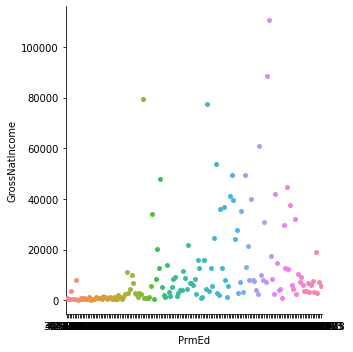

In [0]:
import seaborn as sn
test = dfEducationDetails.toPandas()
test = test[(test.PrmEd > 0) & (test.GrossNatIncome > 0)]

seaborn = sn.catplot (x = 'PrmEd', y = 'GrossNatIncome', data = test)
plt.show ()

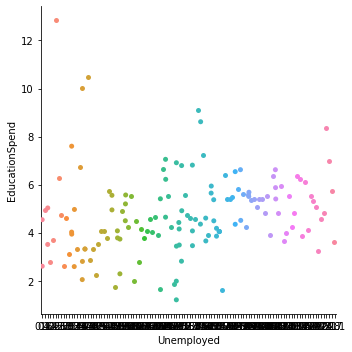

In [0]:
test = dfEducationDetails.toPandas()
test = test[(test.EducationSpend > 0) & (test.Unemployed > 0)]
seaborn = sn.catplot (x = 'Unemployed', y = 'EducationSpend', data = test)
plt.show ()

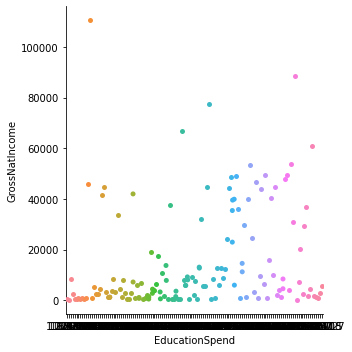

In [0]:
test = dfEducationDetails.toPandas()
test = test[(test.EducationSpend > 0) & (test.GrossNatIncome > 0)]
seaborn = sn.catplot (x = 'EducationSpend', y = 'GrossNatIncome', data = test)
plt.show ()

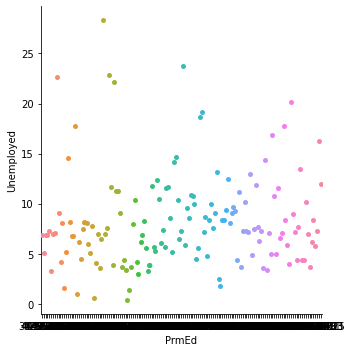

In [0]:
test = dfEducationDetails.toPandas()
test = test[(test.PrmEd > 0) & (test.Unemployed > 0)]
seaborn = sn.catplot (x = 'PrmEd', y = 'Unemployed', data = test)
plt.show ()

Out[133]: <seaborn.axisgrid.PairGrid at 0x7f863823eac0>

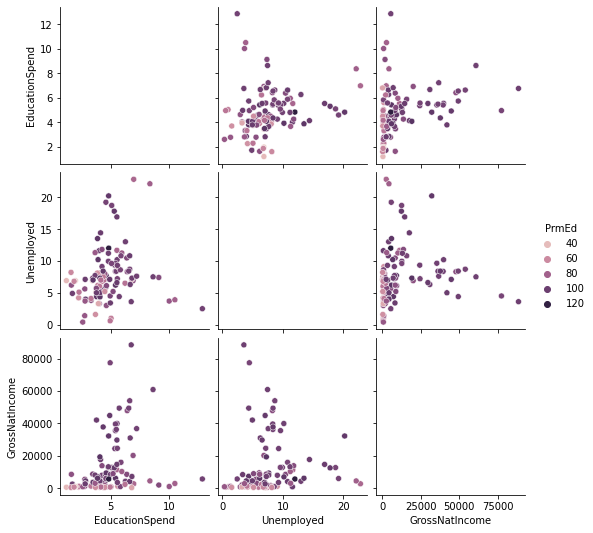

In [0]:
# Let's look at how different factors are influenced 
test = dfEducationDetails.toPandas()
test = test[(test.PrmEd > 0) & (test.Unemployed > 0) & (test.EducationSpend > 0) & (test.GrossNatIncome > 0)]
sn.pairplot(data=test,kind='scatter', hue='PrmEd')

Out[134]: <AxesSubplot:title={'center':'Public Spend on Education - % of GDP V Unemployed % of Total Workforce by Income Level'}, xlabel='Income_Level'>

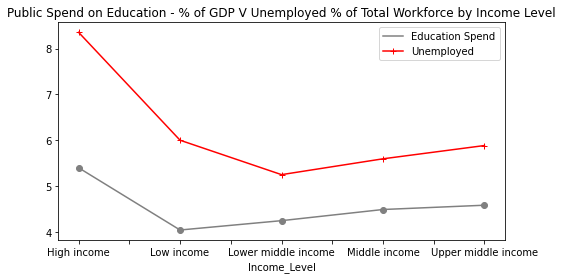

In [0]:
lsCountry = ['High income', 'Middle income' ,  'Low income',  'Lower middle income', 'Upper middle income'] 

sdfFilteredIncome = dfEducationDetails.filter(dfEducationDetails.Country_Name.isin(lsCountry))
sdfFilteredIncome = sdfFilteredIncome.withColumnRenamed("Country_Name","Income_Level")
pdf = sdfFilteredIncome.toPandas()
# gca stands for 'get current axis'
ax = plt.gca()

pdf.plot(kind='line', x='Income_Level', y='EducationSpend', color='gray', ax=ax,  marker='o', figsize = (8,4))
#plt.ylabel ('Education Spend')
plt.xlabel ('Income Level')
plt.title ('Public Spend on Education - % of GDP V Unemployed % of Total Workforce by Income Level')
plt.legend(['Education Spend'], loc='upper left')

pdf1 = pdf
pdf1.plot(kind='line', x='Income_Level', y='Unemployed', color='red', ax=ax,  marker='+', figsize = (8,4))
#pdf1.legend(['1990'], loc='upper left')



In [0]:
#display(dfEducationDetails)

#import pyspark.sql.functions as F
#meanEducationSpend = dfEducationDetails.filter(dfEducationDetails['EducationSpend'] >= 0).agg(F.mean('EducationSpend').alias('meanEducationSpend')).show()
#meanUnemployed = dfEducationDetails.filter(dfEducationDetails['Unemployed'] >= 0).agg(F.mean('Unemployed').alias('meanUnemployed'))
#meanPoverty = dfEducationDetails.filter(dfEducationDetails['GrossNatIncome'] >= 0).agg(F.mean('GrossNatIncome').alias('meanGrossNatIncome'))
#meanPrmEd = dfEducationDetails.filter(dfEducationDetails['PrmEd'] >= 0).agg(F.mean('PrmEd').alias('meanPrmEd'))



In [0]:
# Display variable types
dfEducationDetails.printSchema()

root
 |-- Country_Code: string (nullable = true)
 |-- Country_Name: string (nullable = true)
 |-- EducationSpend: float (nullable = false)
 |-- Unemployed: float (nullable = false)
 |-- GrossNatIncome: float (nullable = false)
 |-- PrmEd: float (nullable = false)



In [0]:
# drop null fields
dfEducationDetails = dfEducationDetails.na.drop()

In [0]:
# Vector Assembler uses transform to convert the input columns into a single vector called features

from pyspark.ml.feature import VectorAssembler
dfEducationDetails.columns

dfKMeans = dfEducationDetails.filter((dfEducationDetails.EducationSpend > 0) & (dfEducationDetails.PrmEd > 0)).select("EducationSpend", "Unemployed", "PrmEd", "GrossNatIncome")
assemble = VectorAssembler(inputCols=dfKMeans.columns, outputCol='features')

assembled_data = assemble.transform(dfKMeans)

In [0]:
# Data is standardized to bring to a comparable scale i.e. big difference between Gross National Income and Percentage Values

from pyspark.ml.feature import StandardScaler
scale = StandardScaler(inputCol='features', outputCol='scaled_features')
data_scale = scale.fit(assembled_data)
data_scale_output = data_scale.transform(assembled_data)
data_scale_output.show(2)



+--------------+----------+--------+--------------+--------------------+--------------------+
|EducationSpend|Unemployed|   PrmEd|GrossNatIncome|            features|     scaled_features|
+--------------+----------+--------+--------------+--------------------+--------------------+
|        6.3713| 10.462289|91.79069|      8431.488|[6.37130022048950...|[3.41710004019843...|
|       4.79943|  9.944502|97.54595|      12724.33|[4.79942989349365...|[2.57406361565657...|
+--------------+----------+--------+--------------+--------------------+--------------------+
only showing top 2 rows



In [0]:
#Kmeans is a clustering alogorithm for grouping data into a predefined number of clusters. 
#K is the number of clusters specified by the user
#Max iterations the number of iterations before clustering algorithm stops
#initailization Mode specifies either random iniitalization of centroids or initialization via k-means
#epsilon distance k-means is expected to cover
#initalMode optional set of clusters centroids that can be used to provide as an input. If this parameter used, algorithm only runs once to allocate points to nearest centroid

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

#train (k=4, maxIterations=20, minDivisibleClusterSize =1.0, seed = -1888008064)

# Evaluate the Clustering by calculating the silhouette score of squared euclidean distance. Below 4 looks like the ideal k value but there is no right answer. 
# Silhouette Value of 1 means maxiumum seperation and 0 is data can barely be seperated

silhouette_score=[]

evaluator = ClusteringEvaluator(predictionCol = 'prediction', featuresCol = 'scaled_features', metricName = 'silhouette', distanceMeasure = 'squaredEuclidean')

for i in range (2,10):
    KMeans_algo=KMeans (featuresCol = 'scaled_features', k = i)
    KMeans_fit = KMeans_algo.fit(data_scale_output)
    output = KMeans_fit.transform(data_scale_output)
    
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print ("Silhouette Score :", score)

Silhouette Score : 0.38934461070603693
Silhouette Score : 0.423850527388968
Silhouette Score : 0.49826132165868353
Silhouette Score : 0.37860284683894685
Silhouette Score : 0.5069093156281514
Silhouette Score : 0.5273906544492913
Silhouette Score : 0.5176677718482006
Silhouette Score : 0.42689345227070435


Out[141]: Text(0, 0.5, 'silhouette score - squared eculidean distance')

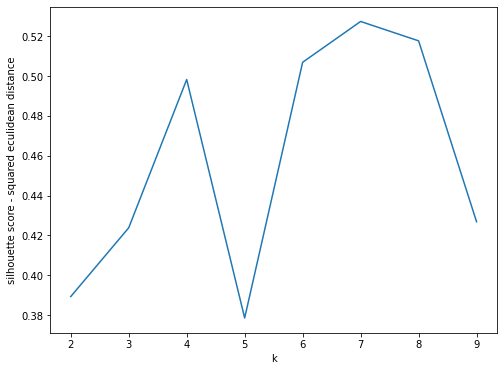

In [0]:
# visulise the silhouette score in a plot which measures how close each point in one cluster is to points in the neighboring clusters thus helping in figuring 
# out clusters that are compact and well spaced out


fig, ax =  plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10), silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('silhouette score - squared eculidean distance')

In [0]:
# Build KMeans Clustering Model

KMeans_algo=KMeans (featuresCol = 'scaled_features', k = 3)
KMeans_fit = KMeans_algo.fit(data_scale_output)
output = KMeans_fit.transform(data_scale_output)

In [0]:
# Perform Principal Component Analysis PCA k=2 represents the number of principal components
from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k = 2, inputCol = "scaled_features", outputCol = "pca")
pca_model = pca.fit(data_scale_output)
pca_transformed = pca_model.transform(data_scale_output)
# extract the principal components
x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())
# retreive the cluster assignments from k-means assignments
cluster_assignment = np.array(output.rdd.map (lambda row: row.prediction).collect()).reshape(-1,1)

Out[144]: <seaborn.axisgrid.FacetGrid at 0x7f862d48a3a0>

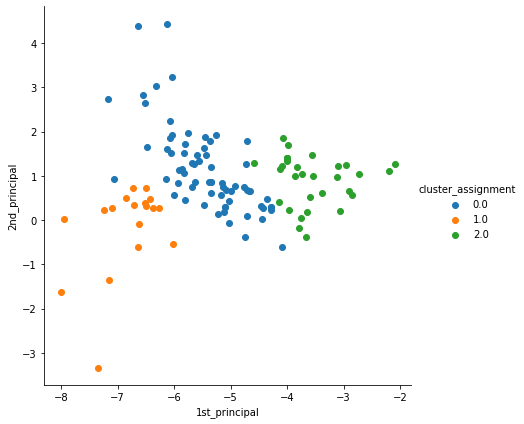

In [0]:
# Finally plot the principal components

pca_data = np.hstack ((x_pca, cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns = ("1st_principal", "2nd_principal", "cluster_assignment"))
sn.FacetGrid(pca_df, hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

In [0]:
# Q2. How does contraceptive prevalence impact fertility rates? Are there fewer maternal and birth deaths in areas with a high level of contraception use?

#Condom use with non regular partner, % adults(15-49), female	= SH.CON.AIDS.FE.ZS	
#Condom use with non regular partner, % adults(15-49), male	= SH.CON.AIDS.MA.ZS	
#Condom use, population ages 15-24, female (% of females ages 15-24)	= SH.CON.1524.FE.ZS	
#Condom use, population ages 15-24, male (% of males ages 15-24)	= SH.CON.1524.MA.ZS	

#Lifetime risk of maternal death (%)	= SH.MMR.RISK.ZS	
#Adolescent fertility rate (births per 1,000 women ages 15-19) =	SP.ADO.TFRT
#Fertility rate, total (births per woman) =	SP.DYN.TFRT.IN
#Prevalence of HIV, total (% of population ages 15-49)	= SH.DYN.AIDS.ZS
#Contraceptive prevalence, any methods (% of women ages 15-49)	SP.DYN.CONU.ZS	Use 2000

lsFilter = ['SH.CON.AIDS.FE.ZS', 'SH.CON.AIDS.MA.ZS', 'SH.CON.1524.FE.ZS', 'SH.CON.1524.MA.ZS', 'SH.MMR.RISK.ZS', 'SP.ADO.TFRT', 'SP.DYN.TFRT.IN', 'SH.HIV.INCD.ZS', 
            'SH.HIV.1524.FE.ZS', 'SH.HIV.1524.MA.ZS', 'SH.DYN.AIDS.ZS', 'SP.DYN.CONM.ZS', 'SP.DYN.CONU.ZS']

sdfBirths1 = sdfBirths
sdfBirths2 = sdfBirths
sdfBirths3 = sdfBirths
sdfBirths4 = sdfBirths

sdfBirths = sdfBirths.filter(sdfBirths.Indicator_Code.isin(lsFilter)).select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code", "1960", "1970", "1980", "1990", "2000", "2010", "2015")

In [0]:
sdfBirths.describe()

Out[146]: DataFrame[summary: string, Country_Code: string, Country_Name: string, Indicator_Name: string, Indicator_Code: string, 1960: string, 1970: string, 1980: string, 1990: string, 2000: string, 2010: string, 2015: string]

In [0]:
sdfBirths = sdfBirths.withColumnRenamed("2000","MatDeathRisk")
sdfBirths = sdfBirths.filter(sdfBirths.Indicator_Code == 'SH.MMR.RISK.ZS').select("Country_Code", "Country_Name", "Indicator_Code", "MatDeathRisk")
sdfBirths.write.saveAsTable("MatDth", mode = "overwrite")

In [0]:
sdfBirths1 = sdfBirths1.withColumnRenamed("2000","AdolFertility")
sdfBirths1 = sdfBirths1.filter(sdfBirths1.Indicator_Code == 'SP.ADO.TFRT').select("Country_Code", "Indicator_Code", "AdolFertility")
sdfBirths1.write.saveAsTable("AdolFert", mode = "overwrite")

In [0]:
sdfBirths2 = sdfBirths2.withColumnRenamed("2000","FertilityRates")
sdfBirths2 = sdfBirths2.filter(sdfBirths2.Indicator_Code == 'SP.DYN.TFRT.IN').select("Country_Code", "Indicator_Code", "FertilityRates")
sdfBirths2.write.saveAsTable("FertRates", mode = "overwrite")

In [0]:
sdfBirths4 = sdfBirths4.withColumnRenamed("2000","Contraception")
sdfBirths4 = sdfBirths4.filter(sdfBirths4.Indicator_Code == 'SP.DYN.CONU.ZS').select("Country_Code", "Indicator_Code", "Contraception")
sdfBirths4.write.saveAsTable("Contra", mode = "overwrite")

In [0]:
spark.sql("UPDATE MatDth SET MatDeathRisk = (select percentile(MatDeathRisk, 0.5) as medianMatDeathRisk from MatDth) Where MatDeathRisk is null")
spark.sql("UPDATE AdolFert SET AdolFertility = (select percentile(AdolFertility, 0.5) as medianAdolFertility from AdolFert) Where AdolFertility is null")
spark.sql("UPDATE FertRates SET FertilityRates = (select percentile(FertilityRates, 0.5) as medianFertilityRates from FertRates) Where FertilityRates is null")
spark.sql("UPDATE Contra SET Contraception = (select percentile(Contraception, 0.5) as medianContraception from Contra) Where Contraception is null")

Out[151]: DataFrame[num_affected_rows: bigint]

In [0]:
dfBirthDetails = spark.sql("select MDR.Country_Code, MDR.Country_Name, nvl(MDR.MatDeathRisk, 0) as MatDeathRisk, nvl(AD.AdolFertility, 0) as AdolFertility,  "\
 " nvl(FR.FertilityRates, 0) as FertilityRates, nvl(C.Contraception, 0) as Contraception from MatDth MDR, FertRates FR, " \
"  AdolFert AD, Contra C where MDR.Country_Code = AD.Country_Code and MDR.Country_Code = FR.Country_Code  and MDR.Country_Code = C.Country_Code " )

In [0]:
dfBirthDetails = spark.sql("select MDR.Country_Code, MDR.Country_Name, nvl(MDR.MatDeathRisk, 0) as MatDeathRisk, nvl(AD.AdolFertility, 0) as AdolFertility,  "\
 " nvl(FR.FertilityRates, 0) as FertilityRates, nvl(C.Contraception, 0) as Contraception from MatDth MDR, FertRates FR, AdolFert AD, Contra C where" \
"  MDR.Country_Code = AD.Country_Code and MDR.Country_Code = FR.Country_Code and MDR.Country_Code = C.Country_Code " )


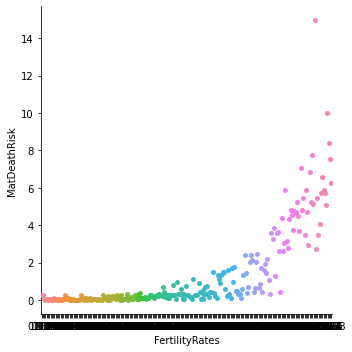

In [0]:
test = dfBirthDetails.toPandas()
test = test[(test.FertilityRates > 0) & (test.MatDeathRisk > 0)]

seaborn = sn.catplot (x = 'FertilityRates', y = 'MatDeathRisk', data = test)
plt.show ()

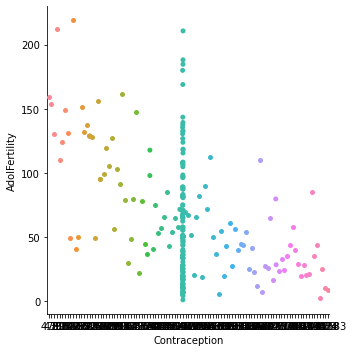

In [0]:
test = dfBirthDetails.toPandas()
test = test[(test.AdolFertility > 0) & (test.Contraception > 0)]

seaborn = sn.catplot (x = 'Contraception', y = 'AdolFertility', data = test)
plt.show ()

Out[156]: <seaborn.axisgrid.PairGrid at 0x7f862d3f21f0>

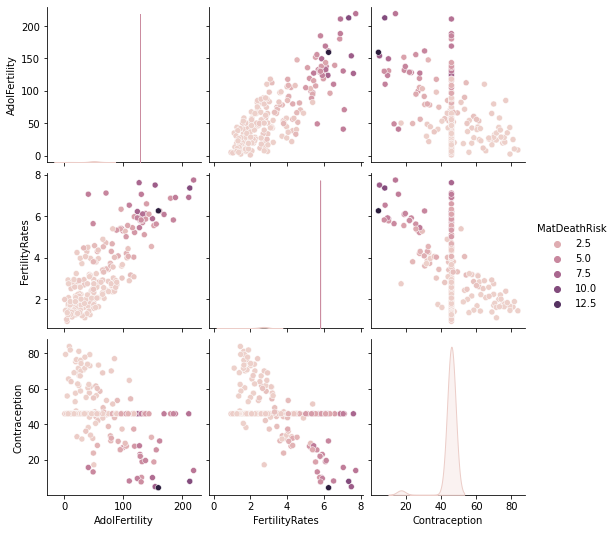

In [0]:
# Let's look at how different factors are influenced by the size
# of the party
test = dfBirthDetails.toPandas()
sn.pairplot(data=test,kind='scatter', hue='MatDeathRisk')

In [0]:
from pyspark.ml.feature import VectorAssembler

# Vector Assembler called to combine a list of columns into a single column features

assembler = VectorAssembler(inputCols = ['AdolFertility', 'FertilityRates',  'Contraception', 'MatDeathRisk'],outputCol='features')

dfBirthDetails = dfBirthDetails.withColumn("AdolFertility",col("AdolFertility").cast("integer"))
dfBirthDetails = dfBirthDetails.withColumn("FertilityRates",col("FertilityRates").cast("integer"))
dfBirthDetails = dfBirthDetails.withColumn("Contraception",col("Contraception").cast("integer"))
dfBirthDetails = dfBirthDetails.withColumn("MatDeathRisk",col("MatDeathRisk").cast("integer"))

df_out = assembler.transform(dfBirthDetails)


# MatDeathRisk Column to be renamed as label
clean_df = df_out.select(['features', 'MatDeathRisk'])
clean_df = clean_df.withColumnRenamed("MatDeathRisk","label")

# Initialize the `standardScaler
standardScaler = StandardScaler(withMean = True, withStd = True, inputCol="features", outputCol="features_scaled")

# Fit the DataFrame to the scaler
scaler = standardScaler.fit(clean_df)

# Transform the data in `df` with the scaler
scaled_df = scaler.transform(clean_df)


# Inspect the result
scaled_df = scaled_df.select('label', col('features_scaled').alias("features"))

scaled_df.show(5)


+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[-0.1736687823375...|
|    0|[0.22758386700356...|
|    0|[-0.8424231979061...|
|    1|[0.09383298388985...|
|    0|[-0.9315904533152...|
+-----+--------------------+
only showing top 5 rows



In [0]:
from pyspark.ml.regression import LinearRegression


# Split the data between train and test

train,test = scaled_df.randomSplit([0.7, 0.3], seed=42)

# creating an instance of a Linear Regression model
lr_model = LinearRegression(featuresCol = 'features', labelCol='label', maxIter=10, regParam=0.3, elasticNetParam=0.8)

# fit the model to the train data

fit_model = lr_model.fit(train)

    
# Evaluate Models performace using the test data

#test_results = fit_model.evaluate(test)

# Access Values like R-squared
trainingSummary = fit_model.summary
print("r2 : %f" % + trainingSummary.r2)
print("RSME : %f" % + trainingSummary.rootMeanSquaredError)
print("Coefficients: " + str(fit_model.coefficients))
print("Intercept: " + str(fit_model.intercept))
    

# RSME gives the difference between predicted values by the model and the actual values. However RMSE alone is meaningless until we compare with the
# actual life expectancy values such as mean, min, max. After comparision RMSE is looking good

# Coefficients are the values that mutliply the predictor values for Y = 2X + 4 the value of 2 is the coeffiecient. Values between 0.3 and 0.7 indicate a moderate
# positive linear relationship through a fuzzy-firm linear rule. Values between 0.7 and 1.0 (-0.7  and -1.0 - for negative) indicate a strong postive (negative) linear
# relationship through a firm linear rule.

# R2 is the coefficient of determination which is a statistical measure in regression model that determines the proportion of variance in the dependent variable that can
# be explained by the independent variable. In other words, r-squared (r2) shows how well the data data fit the regression model. A Value of 0.9 indicates that 
# 90% of the variance of the dependdent variable being studied is explained by the variancce of the indpendent variable



r2 : 0.972101
RSME : 0.294338
Coefficients: [0.0,0.0033939837025021525,0.0,1.6238067390332975]
Intercept: 0.9340110543357991


In [0]:
from pyspark.ml.classification import DecisionTreeClassifier


# creating an instance of a DecisionTree model
 
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 2)
                    #        numTrees = 20)
    
# Train model with Training Data
dtModel = dt.fit(train)
                                  
df_out = assembler.transform(dfBirthDetails)

# MatDeathRisk Column to be renamed as label
clean_df = df_out.select(['features', 'MatDeathRisk'])
clean_df = clean_df.withColumnRenamed("MatDeathRisk","label")

# Initialize the `standardScaler` - Compute summary statistics by fitting the StandardScaler
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

# Fit the DataFrame to the scaler
scaler = standardScaler.fit(clean_df)

# Transform the data in `df` with the scaler
scaled_df = scaler.transform(clean_df)

# Inspect the result
scaled_df = scaled_df.select('label', col('features_scaled').alias("features"))
# Split the data between train and test

train,test = scaled_df.randomSplit([0.7, 0.3], seed=42)

# Make predictions on validation data using the transform() method.

# creating an instance of a Decise
predictions = dtModel.transform(test)
# fit the model to the train data

#scaled_df.show(3)

    


In [0]:
# Evaluate Models performace

from pyspark.ml.evaluation import MulticlassClassificationEvaluator 
evaluator = MulticlassClassificationEvaluator()
print("Test Area Under Accuracy: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})))

print("Test Area Under truePositiveRateByLabel: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "truePositiveRateByLabel"})))

# evaluate predictions
acc = evaluator.evaluate(predictions)
 
print("Prediction Accuracy: ", acc)
 
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("label").collect()



Test Area Under Accuracy: 0.024096385542168676
Test Area Under truePositiveRateByLabel: 0.0
Prediction Accuracy:  0.0034423407917383827


In [0]:

from pyspark.ml.classification import RandomForestClassifier
# Create an initial RandomForest model.
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 2,\
                            numTrees = 20)
# Train model with Training Data
rfModel = rf.fit(train)

# Make predictions on validation data using the transform() method.
# transform() will only use the 'features' column.
predictions = rfModel.transform(test)


In [0]:
# evaluate predictions
evaluator = MulticlassClassificationEvaluator()

print("Test Area Under Accuracy: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})))

print("Test Area Under truePositiveRateByLabel: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "truePositiveRateByLabel"})))

Test Area Under Accuracy: 0.8192771084337349
Test Area Under truePositiveRateByLabel: 1.0


In [0]:
# Q3 Is there a correlation between Government Health Expenditure and mortality rates? Are the claims about Government health spending in the Michael Moore documentary Sicko true?

# filter data based on list values 
lsCountry = ['France', 'Cuba', 'United Kingdom', 'United States', 'Canada'] 


#Hospital beds (per 1,000 people) =	SH.MED.BEDS.ZS
#Life expectancy at birth, total (years) =	SP.DYN.LE00.IN
#Death rate, crude (per 1,000 people)	= SP.DYN.CDRT.IN	
#Survival to age 65, female (% of cohort) =	SP.DYN.TO65.FE.ZS
#Survival to age 65, male (% of cohort)	= SP.DYN.TO65.MA.ZS
#Physicians (per 1,000 people)	= SH.MED.PHYS.ZS
#Mortality rate, infant (per 1,000 live births)	= SP.DYN.IMRT.IN
#Mortality rate, under-5 (per 1,000)	= SH.DYN.MORT

    
lsFilter3 = ['SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS', 'SP.DYN.CDRT.IN', 'SP.DYN.LE00.IN', 'SH.MED.BEDS.ZS', 'SH.MED.PHYS.ZS', 'SP.DYN.IMRT.IN', 'SH.DYN.MORT']

# Only select for year 1995 onwards as there is no data prior to 1995 with the exception of Life Expectancy & Death Rates variables
#SQLContext(sparkContext=spark.sparkContext, sparkSession=spark)

# You can use the filter() here to filter on a condition (just like we did with RDD!)
    
sdfMMFiltered = sdfMM.filter((sdfMM.Country_Name.isin("France", "Cuba", "United Kingdom", "United States", "Canada")) &
                 (sdfMM.Indicator_Code.isin(lsFilter3))).select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code","1970", "1975","1980", "1985", "1990", "1995", "2000", "2005", "2010")

sdfMMFiltered.write.saveAsTable("MikeMoore", mode = "overwrite", mergeSchema = "true")
sdfMMFiltered.show()

sdfMMFiltered = sdfMMFiltered.withColumn("1980",col("1980").cast("float"))
sdfMMFiltered = sdfMMFiltered.withColumn("2010",col("2010").cast("float"))

#Death rate, crude (per 1,000 people)

sdfMMFilteredDeath = sdfMMFiltered.filter(sdfMMFiltered.Indicator_Code == 'SP.DYN.CDRT.IN').select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code", "1980", "1985", "1990", "1995", "2000", "2005", "2010")

+------------+------------+--------------------+-----------------+---------+---------+---------+--------+---------+--------+---------+---------+---------+
|Country_Code|Country_Name|      Indicator_Name|   Indicator_Code|     1970|     1975|     1980|    1985|     1990|    1995|     2000|     2005|     2010|
+------------+------------+--------------------+-----------------+---------+---------+---------+--------+---------+--------+---------+---------+---------+
|         CAN|      Canada|Death rate, crude...|   SP.DYN.CDRT.IN|      7.3|      7.3|      7.1|     7.0|      7.3|     7.1|      7.1|      7.1|      7.1|
|         CAN|      Canada|Hospital beds (pe...|   SH.MED.BEDS.ZS|      7.0|     null|      6.8|     6.8|      6.0|     5.0|      3.4|      3.4|      2.7|
|         CAN|      Canada|Life expectancy a...|   SP.DYN.LE00.IN|72.700485|73.521706| 75.07805|76.30341|77.377075|77.97756| 79.23659| 80.29269|81.412926|
|         CAN|      Canada|Mortality rate, i...|   SP.DYN.IMRT.IN|    

Out[164]: <AxesSubplot:title={'center':'Deaths Rate by 1000 per country'}, xlabel='Country_Name', ylabel='Death Rate per 1000'>

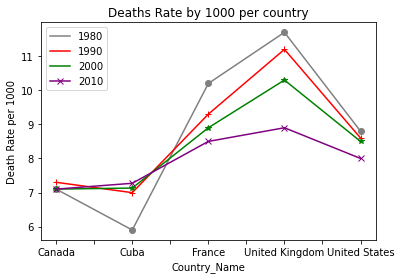

In [0]:
pdf = sdfMMFilteredDeath.toPandas()
# gca stands for 'get current axis'
ax = plt.gca()

pdf.plot(kind='line', x='Country_Name', y='1980', color='gray', ax=ax,  marker='o')
plt.ylabel ('Death Rate per 1000')
plt.xlabel ('Country Name')
plt.title ('Deaths Rate by 1000 per country')
plt.legend(['1980'], loc='upper left')

pdf1 = pdf
pdf1.plot(kind='line', x='Country_Name', y='1990', color='red', ax=ax,  marker='+')
#pdf1.legend(['1990'], loc='upper left')

pdf2 = pdf
pdf2.plot(kind='line', x='Country_Name', y='2000', color='green', ax=ax,  marker='*')
#pdf1.legend(['2000'], loc='upper left')

pdf3 = pdf
pdf3.plot(kind='line', x='Country_Name', y='2010', color='purple', ax=ax,  marker='x')
#pdf1.legend(['2000'], loc='upper left')

In [0]:
#Hospital beds (per 1,000 people)

sdfMMFilteredHospital = sdfMMFiltered.filter(sdfMMFiltered.Indicator_Code == 'SH.MED.BEDS.ZS').select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code",  "1980", "1985", "1990", "1995", "2000", "2005", "2010")

sdfMMFilteredHospital.show()

+------------+--------------+--------------------+--------------+----+----+------+----+----+------+----+
|Country_Code|  Country_Name|      Indicator_Name|Indicator_Code|1980|1985|  1990|1995|2000|  2005|2010|
+------------+--------------+--------------------+--------------+----+----+------+----+----+------+----+
|         CAN|        Canada|Hospital beds (pe...|SH.MED.BEDS.ZS| 6.8| 6.8|   6.0| 5.0| 3.4|   3.4| 2.7|
|         CUB|          Cuba|Hospital beds (pe...|SH.MED.BEDS.ZS|null|null|5.4212|null|null|   4.9| 5.9|
|         FRA|        France|Hospital beds (pe...|SH.MED.BEDS.ZS|11.1|10.5|   9.7| 8.9| 8.1|7.2754|6.64|
|         GBR|United Kingdom|Hospital beds (pe...|SH.MED.BEDS.ZS| 8.1| 7.4|   5.9| 4.8| 4.2|  null|2.98|
|         USA| United States|Hospital beds (pe...|SH.MED.BEDS.ZS| 6.0| 5.5|   4.9| 4.1| 3.5|   3.2| 3.0|
+------------+--------------+--------------------+--------------+----+----+------+----+----+------+----+



Out[166]: <AxesSubplot:title={'center':'Hospital Beds 1000 per Country'}, xlabel='Country_Name', ylabel='Hospital Beds per 1000'>

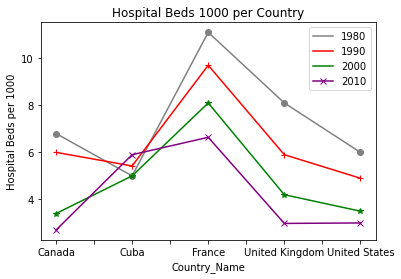

In [0]:
pdf = sdfMMFilteredHospital.toPandas()

# gca stands for 'get current axis'
ax = plt.gca()
pdf['1980'] = pdf['1980'].fillna(5)
pdf.plot(kind='line', x='Country_Name', y='1980', color='gray', ax=ax,  marker='o')
plt.ylabel ('Hospital Beds per 1000')
plt.xlabel ('Country Name')
plt.title ('Hospital Beds 1000 per Country')
plt.legend(['1980'], loc='upper left')

pdf1 = pdf
pdf1.plot(kind='line', x='Country_Name', y='1990', color='red', ax=ax,  marker='+')
#pdf1.legend(['1990'], loc='upper left')

pdf2 = pdf
pdf2['2000'] = pdf['2000'].fillna(5)
pdf2.plot(kind='line', x='Country_Name', y='2000', color='green', ax=ax, marker='*')
#pdf1.legend(['2000'], loc='upper left')

pdf3 = pdf
pdf3.plot(kind='line', x='Country_Name', y='2010', color='purple', ax=ax, marker='x')
#pdf1.legend(['2000'], loc='upper left')


In [0]:
#Life expectancy at birth, total (years)

sdfMMFilteredLife = sdfMMFiltered.filter(sdfMMFiltered.Indicator_Code == 'SP.DYN.LE00.IN').select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code", "1970", "1975","1980", "1985", "1990", "1995", "2000", "2005", "2010")

sdfMMFilteredLife.show()

+------------+--------------+--------------------+--------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|Country_Code|  Country_Name|      Indicator_Name|Indicator_Code|     1970|     1975|     1980|     1985|     1990|     1995|     2000|     2005|     2010|
+------------+--------------+--------------------+--------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|         CAN|        Canada|Life expectancy a...|SP.DYN.LE00.IN|72.700485|73.521706| 75.07805| 76.30341|77.377075| 77.97756| 79.23659| 80.29269|81.412926|
|         CUB|          Cuba|Life expectancy a...|SP.DYN.LE00.IN|69.883095| 72.19761| 73.83176| 74.52892| 74.64381|   75.409|76.644806|77.932144| 78.93563|
|         FRA|        France|Life expectancy a...|SP.DYN.LE00.IN| 71.65854| 72.85366|74.051216|     75.3|     76.6| 77.75122|  79.0561|80.163414|81.663414|
|         GBR|United Kingdom|Life expectancy a...|SP.DYN.LE00.IN

Out[168]: <AxesSubplot:title={'center':'Life Expectancy per Country'}, xlabel='Country_Name', ylabel='Life Expectancy'>

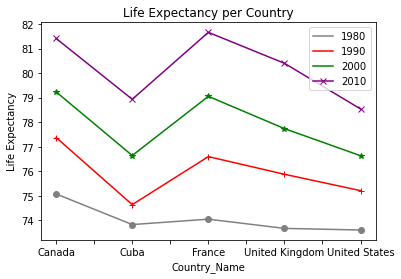

In [0]:
pdf = sdfMMFilteredLife.toPandas()

# Let's use *apply* to call a function over each element, returning a new Series
#pdf['1980'] = pdf['1980'].fillna(5)
#pdf['2000'] = pdf['1980'].fillna(5)

#pdf['1980'].fillna("5.0", inplace = True)
# gca stands for 'get current axis'
ax = plt.gca()
pdf.plot(kind='line', x='Country_Name', y='1980', color='gray', ax=ax,  marker='o')
plt.ylabel ('Life Expectancy')
plt.xlabel ('Country Name')
plt.title ('Life Expectancy per Country')
plt.legend(['1980'], loc='upper left')

pdf1 = pdf
pdf1.plot(kind='line', x='Country_Name', y='1990', color='red', ax=ax,  marker='+')
#pdf1.legend(['1990'], loc='upper left')

pdf2 = pdf
pdf2.plot(kind='line', x='Country_Name', y='2000', color='green', ax=ax, marker='*')
#pdf1.legend(['2000'], loc='upper left')

pdf3 = pdf
pdf3.plot(kind='line', x='Country_Name', y='2010', color='purple', ax=ax, marker='x')
#pdf1.legend(['2000'], loc='upper left')

In [0]:
#Survival to age 65, female (% of cohort) 

sdfMMFilteredFemale = sdfMMFiltered.filter(sdfMMFiltered.Indicator_Code == 'SP.DYN.TO65.FE.ZS').select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code", "1980", "1985", "1990", "1995", "2000", "2005", "2010")

sdfMMFilteredFemale.show()

+------------+--------------+--------------------+-----------------+--------+--------+--------+--------+--------+--------+--------+
|Country_Code|  Country_Name|      Indicator_Name|   Indicator_Code|    1980|    1985|    1990|    1995|    2000|    2005|    2010|
+------------+--------------+--------------------+-----------------+--------+--------+--------+--------+--------+--------+--------+
|         CAN|        Canada|Survival to age 6...|SP.DYN.TO65.FE.ZS|85.89489|87.25923|88.28023|89.12837|89.91577|90.61059|91.35695|
|         CUB|          Cuba|Survival to age 6...|SP.DYN.TO65.FE.ZS| 81.5772| 82.5844|  82.931| 84.2946| 85.8912|87.00869|87.78912|
|         FRA|        France|Survival to age 6...|SP.DYN.TO65.FE.ZS|86.59049|87.95492|89.09491| 89.9795|90.69773|91.33829| 91.8211|
|         GBR|United Kingdom|Survival to age 6...|SP.DYN.TO65.FE.ZS|83.77057|85.01161|86.43273|87.79018|88.89019|89.83182|90.59201|
|         USA| United States|Survival to age 6...|SP.DYN.TO65.FE.ZS|83.41933

In [0]:
#Infant mortality per 1000

sdfMMFilteredInfant = sdfMMFiltered.filter(sdfMMFiltered.Indicator_Code == 'SP.DYN.IMRT.IN').select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code", "1980", "1985", "1990", "1995", "2000", "2005", "2010")

sdfMMFilteredInfant.show()

+------------+--------------+--------------------+--------------+----+----+----+----+----+----+----+
|Country_Code|  Country_Name|      Indicator_Name|Indicator_Code|1980|1985|1990|1995|2000|2005|2010|
+------------+--------------+--------------------+--------------+----+----+----+----+----+----+----+
|         CAN|        Canada|Mortality rate, i...|SP.DYN.IMRT.IN|10.3| 8.0| 6.8| 5.7| 5.2| 5.3| 4.9|
|         CUB|          Cuba|Mortality rate, i...|SP.DYN.IMRT.IN|16.7|15.0|10.6| 8.4| 6.5| 5.1| 4.9|
|         FRA|        France|Mortality rate, i...|SP.DYN.IMRT.IN|10.2| 8.5| 7.4| 5.3| 4.4| 3.8| 3.5|
|         GBR|United Kingdom|Mortality rate, i...|SP.DYN.IMRT.IN|12.0| 9.7| 7.9| 6.1| 5.6| 5.1| 4.4|
|         USA| United States|Mortality rate, i...|SP.DYN.IMRT.IN|12.6|10.6| 9.4| 8.0| 7.1| 6.8| 6.3|
+------------+--------------+--------------------+--------------+----+----+----+----+----+----+----+



Out[171]: <AxesSubplot:title={'center':'Infant Mortality per 1000'}, xlabel='Country_Name', ylabel='Infant Mortality per 1000 '>

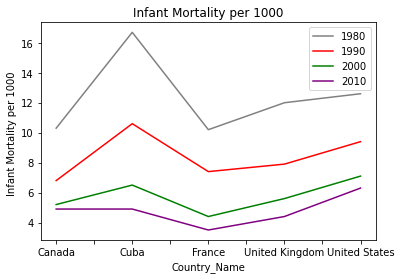

In [0]:
pdf = sdfMMFilteredInfant.toPandas()
# gca stands for 'get current axis'
ax = plt.gca()

pdf.plot(kind='line', x='Country_Name', y='1980', color='gray', ax=ax,)
plt.ylabel ('Infant Mortality per 1000 ')
plt.xlabel ('Country Name')
plt.title ('Infant Mortality per 1000')
plt.legend(['1980'], loc='upper left')

pdf1 = pdf
pdf1.plot(kind='line', x='Country_Name', y='1990', color='red', ax=ax,)
#pdf1.legend(['1990'], loc='upper left')

pdf2 = pdf
pdf2.plot(kind='line', x='Country_Name', y='2000', color='green', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')

pdf3 = pdf
pdf3.plot(kind='line', x='Country_Name', y='2010', color='purple', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')



In [0]:
#Under 5 mortality per 1000

sdfMMFilteredUnder5 = sdfMMFiltered.filter(sdfMMFiltered.Indicator_Code == 'SH.DYN.MORT').select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code", "1980", "1985", "1990", "1995", "2000", "2005", "2010")

sdfMMFilteredUnder5.show()

+------------+--------------+--------------------+--------------+----+----+----+----+----+----+----+
|Country_Code|  Country_Name|      Indicator_Name|Indicator_Code|1980|1985|1990|1995|2000|2005|2010|
+------------+--------------+--------------------+--------------+----+----+----+----+----+----+----+
|         CAN|        Canada|Mortality rate, u...|   SH.DYN.MORT|12.5| 9.7| 8.3| 6.9| 6.2| 6.1| 5.6|
|         CUB|          Cuba|Mortality rate, u...|   SH.DYN.MORT|20.2|18.5|13.3|10.8| 8.4| 6.8| 6.1|
|         FRA|        France|Mortality rate, u...|   SH.DYN.MORT|12.4|10.3| 9.0| 6.5| 5.4| 4.6| 4.3|
|         GBR|United Kingdom|Mortality rate, u...|   SH.DYN.MORT|14.1|11.4| 9.3| 7.2| 6.6| 6.0| 5.2|
|         USA| United States|Mortality rate, u...|   SH.DYN.MORT|15.0|12.7|11.2| 9.5| 8.4| 8.0| 7.4|
+------------+--------------+--------------------+--------------+----+----+----+----+----+----+----+



Out[173]: <AxesSubplot:title={'center':'Under 5 Mortality per 1000'}, xlabel='Country_Name', ylabel='Under 5 Mortality per 1000 '>

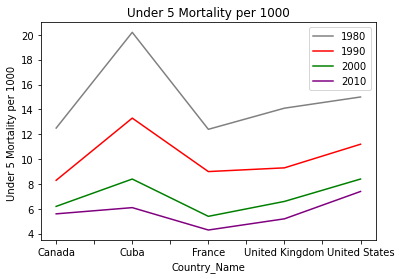

In [0]:
pdf = sdfMMFilteredUnder5.toPandas()
# gca stands for 'get current axis'
ax = plt.gca()

pdf.plot(kind='line', x='Country_Name', y='1980', color='gray', ax=ax,)
plt.ylabel ('Under 5 Mortality per 1000 ')
plt.xlabel ('Country Name')
plt.title ('Under 5 Mortality per 1000')
plt.legend(['1980'], loc='upper left')

pdf1 = pdf
pdf1.plot(kind='line', x='Country_Name', y='1990', color='red', ax=ax,)
#pdf1.legend(['1990'], loc='upper left')

pdf2 = pdf
pdf2.plot(kind='line', x='Country_Name', y='2000', color='green', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')

pdf3 = pdf
pdf3.plot(kind='line', x='Country_Name', y='2010', color='purple', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')


In [0]:
#Survival to age 65, female (% of cohort) 

sdfMMFilteredFemale = sdfMMFiltered.filter(sdfMMFiltered.Indicator_Code == 'SP.DYN.TO65.FE.ZS').select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code", "1980", "1985", "1990", "1995", "2000", "2005", "2010")

sdfMMFilteredFemale.show()

+------------+--------------+--------------------+-----------------+--------+--------+--------+--------+--------+--------+--------+
|Country_Code|  Country_Name|      Indicator_Name|   Indicator_Code|    1980|    1985|    1990|    1995|    2000|    2005|    2010|
+------------+--------------+--------------------+-----------------+--------+--------+--------+--------+--------+--------+--------+
|         CAN|        Canada|Survival to age 6...|SP.DYN.TO65.FE.ZS|85.89489|87.25923|88.28023|89.12837|89.91577|90.61059|91.35695|
|         CUB|          Cuba|Survival to age 6...|SP.DYN.TO65.FE.ZS| 81.5772| 82.5844|  82.931| 84.2946| 85.8912|87.00869|87.78912|
|         FRA|        France|Survival to age 6...|SP.DYN.TO65.FE.ZS|86.59049|87.95492|89.09491| 89.9795|90.69773|91.33829| 91.8211|
|         GBR|United Kingdom|Survival to age 6...|SP.DYN.TO65.FE.ZS|83.77057|85.01161|86.43273|87.79018|88.89019|89.83182|90.59201|
|         USA| United States|Survival to age 6...|SP.DYN.TO65.FE.ZS|83.41933

Out[175]: <AxesSubplot:title={'center':'Female Survival Percentage to 65'}, xlabel='Country_Name', ylabel='Female Survival %'>

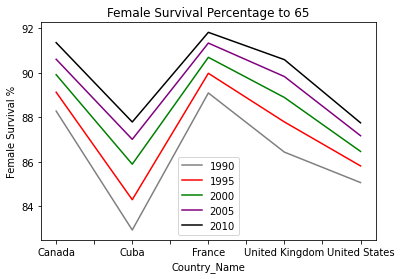

In [0]:
pdf = sdfMMFilteredFemale.toPandas()
# gca stands for 'get current axis'
ax = plt.gca()

pdf.plot(kind='line', x='Country_Name', y='1990', color='gray', ax=ax,)
plt.ylabel ('Female Survival %')
plt.xlabel ('Country Name')
plt.title ('Female Survival Percentage to 65')
plt.legend(['1990'], loc='upper left')

pdf1 = pdf
pdf1.plot(kind='line', x='Country_Name', y='1995', color='red', ax=ax,)
#pdf1.legend(['1990'], loc='upper left')

pdf2 = pdf
pdf2.plot(kind='line', x='Country_Name', y='2000', color='green', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')

pdf3 = pdf
pdf3.plot(kind='line', x='Country_Name', y='2005', color='purple', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')

pdf4 = pdf
pdf4.plot(kind='line', x='Country_Name', y='2010', color='black', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')

In [0]:
#Survival to age 65, male (% of cohort) 

sdfMMFilteredMale = sdfMMFiltered.filter(sdfMMFiltered.Indicator_Code == 'SP.DYN.TO65.MA.ZS').select("Country_Code", "Country_Name", "Indicator_Name", "Indicator_Code", "1980", "1985", "1990", "1995", "2000", "2005", "2010")

sdfMMFilteredMale.show()

+------------+--------------+--------------------+-----------------+--------+--------+--------+--------+--------+--------+--------+
|Country_Code|  Country_Name|      Indicator_Name|   Indicator_Code|    1980|    1985|    1990|    1995|    2000|    2005|    2010|
+------------+--------------+--------------------+-----------------+--------+--------+--------+--------+--------+--------+--------+
|         CAN|        Canada|Survival to age 6...|SP.DYN.TO65.MA.ZS|74.27372|77.16558|  79.432|81.60609|83.61377|85.15813|86.68628|
|         CUB|          Cuba|Survival to age 6...|SP.DYN.TO65.MA.ZS| 76.0152| 76.7058|  76.752| 77.8806| 79.5668|81.11518|82.12442|
|         FRA|        France|Survival to age 6...|SP.DYN.TO65.MA.ZS|71.02288|72.95482|74.98931| 77.2795|79.52697|81.47695|83.18863|
|         GBR|United Kingdom|Survival to age 6...|SP.DYN.TO65.MA.ZS|73.26259|75.60986|78.15975|80.46874|82.42272| 84.1113|85.46811|
|         USA| United States|Survival to age 6...|SP.DYN.TO65.MA.ZS|70.69334

Out[177]: <AxesSubplot:title={'center':'Female Survival Percentage to 65'}, xlabel='Country_Name', ylabel='Male Survival %'>

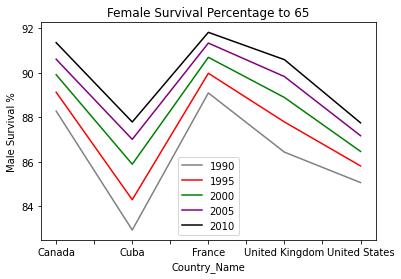

In [0]:
pdf = sdfMMFilteredFemale.toPandas()
# gca stands for 'get current axis'
ax = plt.gca()

pdf.plot(kind='line', x='Country_Name', y='1990', color='gray', ax=ax,)
plt.ylabel ('Male Survival %')
plt.xlabel ('Country Name')
plt.title ('Female Survival Percentage to 65')
plt.legend(['1990'], loc='upper left')

pdf1 = pdf
pdf1.plot(kind='line', x='Country_Name', y='1995', color='red', ax=ax,)
#pdf1.legend(['1990'], loc='upper left')

pdf2 = pdf
pdf2.plot(kind='line', x='Country_Name', y='2000', color='green', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')

pdf3 = pdf
pdf3.plot(kind='line', x='Country_Name', y='2005', color='purple', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')

pdf4 = pdf
pdf4.plot(kind='line', x='Country_Name', y='2010', color='black', ax=ax,)
#pdf1.legend(['2000'], loc='upper left')

In [0]:
#Group By
#The GROUP BY statement is used with aggregate functions (COUNT, MAX, MIN, SUM, AVG) to group the result-set by one or more columns.

# For instance, we can group by Indicator Name over year e.g. 2010 and aggregate over the average value and total data (very easily)
sdfMMGroup = sdfMMFiltered.groupBy('Indicator_Name').agg(min('1990').alias('min_1980'), avg('1980').alias('avg_1980'), max('1980').alias('max_1980'),min('2010').alias('min_2010'), avg('2010').alias('avg_2010'),max('1980').alias('max_1980'))

display(sdfMMGroup)


Indicator_Name,min_1980,avg_1980,max_1980,min_2010,avg_2010,max_1980
"Physicians (per 1,000 people)",1.6,1.6249999701976776,1.9,2.068,3.4782000541687013,1.9
"Hospital beds (per 1,000 people)",4.9,8.000000238418579,11.1,2.7,4.244000005722046,11.1
"Life expectancy at birth, total (years)",74.64381,74.04927825927734,75.07805,78.541466,80.19117431640625,75.07805
"Survival to age 65, female (% of cohort)",82.931,84.25049591064453,86.59049,87.75204,89.86224365234375,86.59049
"Mortality rate, infant (per 1,000 live births)",6.8,12.360000228881836,16.7,3.5,4.800000095367432,16.7
"Survival to age 65, male (% of cohort)",74.03681,73.05354461669921,76.0152,80.1993,83.5333480834961,76.0152
"Mortality rate, under-5 (per 1,000)",8.3,14.84000015258789,20.2,4.3,5.719999980926514,20.2
"Death rate, crude (per 1,000 people)",6.996,8.739999961853027,11.7,7.1,7.954199886322021,11.7


In [0]:
# Q4 Is there much of a difference between quality of life in EU and UK?

# filter data based on list values 
lsCountry = ['United Kingdom', 'European Union'] 


#Hospital beds (per 1,000 people) =	SH.MED.BEDS.ZS
#Life expectancy at birth, total (years) =	SP.DYN.LE00.IN
#Death rate, crude (per 1,000 people)	= SP.DYN.CDRT.IN	
#Survival to age 65, female (% of cohort) =	SP.DYN.TO65.FE.ZS
#Survival to age 65, male (% of cohort)	= SP.DYN.TO65.MA.ZS
#Mortality rate, infant (per 1,000 live births)	= SP.DYN.IMRT.IN
#Mortality rate, under-5 (per 1,000)	= SH.DYN.MORT
    
lsFilterDeath = ['SP.DYN.CDRT.IN']
lsFilterHospital = ['SH.MED.BEDS.ZS']
lsFilterLife = ['SP.DYN.LE00.IN']
lsFilterAge65 = ['SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS']
lsFilterInfant = ['SP.DYN.IMRT.IN']
lsFilterUnder5 = ['SH.DYN.MORT']

# Only select for year 1995 onwards as there is no data prior to 1995 with the exception of Life Expectancy & Death Rates variables
#SQLContext(sparkContext=spark.sparkContext, sparkSession=spark)

# You can use the filter() here to filter on a condition to create a Data Frame for each variable
    
sdfEUFilteredDeath = sdfEU.filter((sdfEU.Country_Name.isin(lsCountry)) & (sdfEU.Indicator_Code.isin(lsFilterDeath))).select("Country_Code", "Indicator_Name", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015")


sdfEUFilteredHospital = sdfEU.filter((sdfEU.Country_Name.isin(lsCountry)) & (sdfEU.Indicator_Code.isin(lsFilterHospital))).select("Country_Code", "Indicator_Name", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015")

sdfEUFilteredLife = sdfEU.filter((sdfEU.Country_Name.isin(lsCountry)) & (sdfEU.Indicator_Code.isin(lsFilterLife))).select("Country_Code", "Indicator_Name", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015")

sdfEUFilteredInfant= sdfEU.filter((sdfEU.Country_Name.isin(lsCountry)) & (sdfEU.Indicator_Code.isin(lsFilterInfant))).select("Country_Code", "Indicator_Name", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015")

sdfEUFilteredUnder5= sdfEU.filter((sdfEU.Country_Name.isin(lsCountry)) & (sdfEU.Indicator_Code.isin(lsFilterUnder5))).select("Country_Code", "Indicator_Name", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015")

sdfEUFilteredAge65 = sdfEU.filter((sdfEU.Country_Name.isin(lsCountry)) & (sdfEU.Indicator_Code.isin(lsFilterAge65))).select("Country_Code", "Indicator_Name", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015")



In [0]:
# Transpose the details to be able to compare the results
pdfDeath = sdfEUFilteredDeath.toPandas()
EUtransposedDeath = pdfDeath.transpose() 

EUtransposedDeath.head(30)


,0,1
Country_Code,EUU,GBR
Indicator_Name,"Death rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)"
1990,10.427038,11.2
1991,10.465131,11.3
1992,10.327559,11.0
1993,10.466112,11.4
1994,10.268046,10.8
1995,10.354099,11.1
1996,10.333269,10.9
1997,10.225587,10.8


In [0]:
pdfHospital = sdfEUFilteredHospital.toPandas()
EUtransposedHospital = pdfHospital.transpose() 

EUtransposedHospital.head(30)


,0,1
Country_Code,EUU,GBR
Indicator_Name,"Hospital beds (per 1,000 people)","Hospital beds (per 1,000 people)"
1990,7.916127,5.9
1991,7.712919,5.6
1992,7.459795,5.4
1993,7.302752,5.1
1994,7.215341,4.8
1995,6.993479,4.8
1996,6.955315,4.6
1997,6.762126,4.6


In [0]:
pdfLife = sdfEUFilteredLife.toPandas()
EUtransposedLife = pdfLife.transpose() 

EUtransposedLife.head(30)

,0,1
Country_Code,EUU,GBR
Indicator_Name,"Life expectancy at birth, total (years)","Life expectancy at birth, total (years)"
1990,74.859238,75.880486
1991,74.967789,76.082924
1992,75.286819,76.434143
1993,75.393593,76.385368
1994,75.68927,76.885368
1995,75.813393,76.836586
1996,76.065552,77.087807
1997,76.358704,77.210976


In [0]:
pdfInfant= sdfEUFilteredInfant.toPandas()

EUtransposedInfant= pdfInfant.transpose() 

EUtransposedInfant.head(30)

,0,1
Country_Code,EUU,GBR
Indicator_Name,"Mortality rate, infant (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)"
1990,10.637539,7.9
1991,10.129876,7.4
1992,9.646863,7.0
1993,9.141925,6.6
1994,8.61592,6.3
1995,8.10275,6.1
1996,7.63869,5.9
1997,7.243571,5.8


In [0]:
pdfUnder5= sdfEUFilteredUnder5.toPandas()

EUtransposedUnder5= pdfUnder5.transpose() 

EUtransposedUnder5.head(30)

,0,1
Country_Code,EUU,GBR
Indicator_Name,"Mortality rate, under-5 (per 1,000)","Mortality rate, under-5 (per 1,000)"
1990,12.632321,9.3
1991,12.018188,8.7
1992,11.429221,8.2
1993,10.837387,7.8
1994,10.210932,7.4
1995,9.623564,7.2
1996,9.073943,7.0
1997,8.603665,6.9


In [0]:
pdfAge65= sdfEUFilteredAge65.toPandas()

EUtransposedAge65= pdfAge65.transpose() 

EUtransposedAge65.head(30)


,0,1,2,3
Country_Code,EUU,EUU,GBR,GBR
Indicator_Name,"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)"
1990,86.883636,73.857277,86.432732,78.159752
1991,87.083275,74.098572,86.752182,78.705803
1992,87.281616,74.33503,87.071632,79.251862
1993,87.509499,74.790504,87.311142,79.657494
1994,87.736435,75.244568,87.550659,80.06311
1995,87.963898,75.699173,87.790176,80.468742
1996,88.191826,76.156036,88.029694,80.874367
1997,88.420464,76.611923,88.269211,81.279999


## Format the Data